# Data distribution and statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/TC-dataset.csv", sep="\t",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  float64
 3   CustomerID       406830 non-null  float64
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


## BasketID
Il basketID è un nominale vediamo da che caratteri è composto (numeri lettere ecc)

In [3]:
print("MAIUSC: "+str(df.BasketID.str.contains('[A-Z]').any()))
print("minuscole: "+str(df.BasketID.str.contains('[a-z]').any()))
print("Numeri: "+str(df.BasketID.str.contains('[0-9]').any()))
print("Segni speciali: "+str(df.BasketID.str.contains('[^A-Za-z0-9]').any()))

MAIUSC: True
minuscole: False
Numeri: True
Segni speciali: False


## BasketDate
Per questo attributo verifichiamo a che intervallo di date include. Per fare ciò cambiamo il tipo della colonna

In [2]:
df_for_dates=df.copy()
df_for_dates["BasketDate"] = pd.to_datetime(df_for_dates['BasketDate'], format='%d/%m/%y %H:%M')
df_for_dates.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


Vediamo che anni sono inclusi

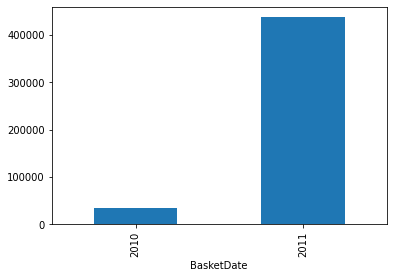

In [5]:
df_for_dates["BasketDate"].groupby(df_for_dates["BasketDate"].dt.year).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2011

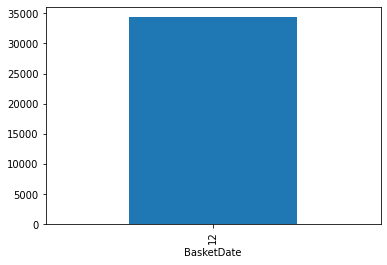

In [16]:
df_for_dates[df_for_dates['BasketDate'] < '2011-01-01']["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2010

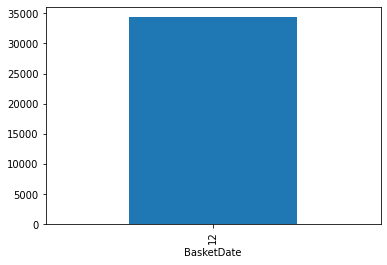

In [17]:

mask=(df_for_dates['BasketDate'] > '2010-01-01' ) & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

In [8]:
print("Distinct Values in CustomerCountry:\t", df.CustomerCountry.unique(), "Len: \n", len(df.CustomerCountry.unique()))
print("Distinct Values in ProdID:\t", df.ProdID.unique(), "Len: \n", len(df.ProdID.unique()))

Distinct Values in CustomerCountry:	 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA'] Len: 
 38
Distinct Values in ProdID:	 ['85123A' '71053' '84406B' ... '90214U' '23645' '23843'] Len: 
 3953


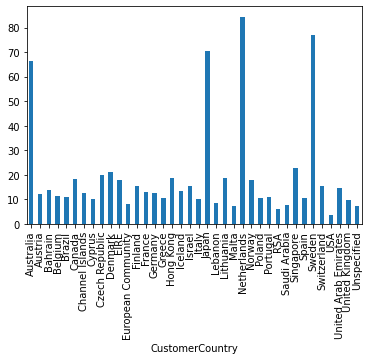

In [5]:
#Ordini medi per nazione
(df.groupby(['CustomerCountry']).mean())["Qta"].plot(kind="bar")


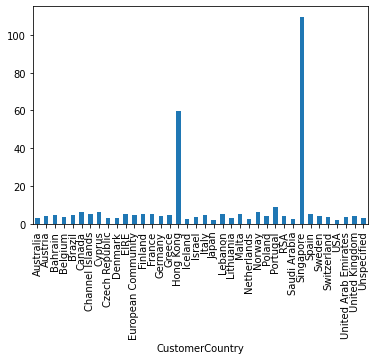

In [20]:
#Sale medio per nazione
df.groupby("CustomerCountry")["Sale"].mean().plot(kind="bar")

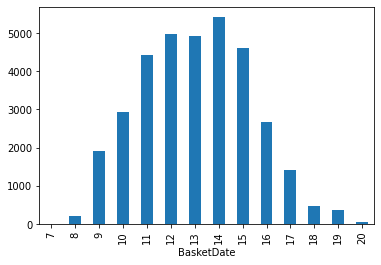

In [13]:
#acquisti per ora effettuati nell'anno 2010.
mask=(df_for_dates['BasketDate'] > '2010-01-01' ) & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.hour).count().plot(kind="bar")

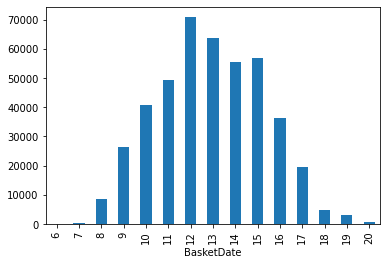

In [19]:
#acquisti per ora effettuati nell'anno 2011.
mask=(df_for_dates['BasketDate'] > '2011-01-01' )
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.hour).count().plot(kind="bar")

In [35]:
#Ordini effettuati per utente (-1 = Customer ID null)
    #unique basketID per user
print("Iniziali: :" , str(len(df.BasketID)))
print("Unici: ", str(len(df.BasketID.unique())))
temp = df.drop_duplicates(subset=['BasketID'], keep='last')
print("Actual for query: ", str(len(temp.BasketID)))
temp.groupby(by="CustomerID", as_index=True)["BasketID"].count()

Iniziali: : 471910
Unici:  24627
Actual for query:  24627


CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: BasketID, Length: 4372, dtype: int64

In [19]:
#Sale medio per customer id
df.groupby("CustomerID")["Sale"].mean()

CustomerID
-1.0        7.596884
 12346.0    1.040000
 12347.0    2.644011
 12348.0    5.764839
 12349.0    8.289041
              ...   
 18280.0    4.765000
 18281.0    5.622857
 18282.0    4.821538
 18283.0    1.614987
 18287.0    1.493571
Name: Sale, Length: 4373, dtype: float64

In [23]:
print("DISTRIBUZIONE PROBABILITà QUANTITà")
print(df["Qta"].describe())
print("DISTRIBUZIONE PROBABILITà SALE")
print(df["Sale"].describe())

DISTRIBUZIONE PROBABILITà QUANTITà
count    471910.000000
mean         10.716533
std         231.355136
min      -80995.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Qta, dtype: float64
DISTRIBUZIONE PROBABILITà SALE
count    471910.000000
mean          4.030945
std          83.769380
min      -11062.060000
25%           1.250000
50%           2.080000
75%           3.750000
max       38970.000000
Name: Sale, dtype: float64


Nazione  United Kingdom  :  10002
Nazione  France  :  10002
Nazione  Australia  :  15036
Nazione  Netherlands  :  15036
Nazione  Germany  :  10002
Nazione  Norway  :  10135
Nazione  EIRE  :  10002
Nazione  Switzerland  :  10002
Nazione  Spain  :  10002
Nazione  Poland  :  15056BL
Nazione  Portugal  :  10133
Nazione  Italy  :  15036
Nazione  Belgium  :  15039
Nazione  Lithuania  :  15056BL
Nazione  Japan  :  10002
Nazione  Iceland  :  16008
Nazione  Channel Islands  :  16161P
Nazione  Denmark  :  15036
Nazione  Cyprus  :  15056N
Nazione  Sweden  :  15036
Nazione  Austria  :  15056BL
Nazione  Israel  :  10133
Nazione  Finland  :  15056BL
Nazione  Bahrain  :  22423
Nazione  Greece  :  15034
Nazione  Hong Kong  :  20674
Nazione  Singapore  :  20681
Nazione  Lebanon  :  21165
Nazione  United Arab Emirates  :  20961
Nazione  Saudi Arabia  :  20781
Nazione  Czech Republic  :  20972
Nazione  Canada  :  10133
Nazione  Unspecified  :  16012
Nazione  Brazil  :  15056BL
Nazione  USA  :  16161P
Naz

<BarContainer object of 5 artists>

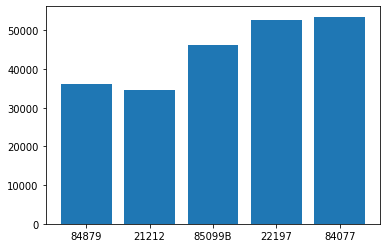

In [12]:
#Item best sold for each country and prodotti venduto maggiormente
from collections import Counter
prods = df.ProdID.unique()
d = {i: 0 for i in prods} #prodotti venduti maggiormente

for country in df.CustomerCountry.unique():
        result = df[df["CustomerCountry"] == country]
        result = result.groupby("ProdID").sum()
        for i in range(len(result)):
                d[result.iloc[i].name]+=result.iloc[i]["Qta"] 
        print("Nazione ", country, " : ", result.iloc[0].name)


#Primi X item più venduti tra le nazioni
x = 5
d = {key: value for key, value in d.items() if value in sorted(set(d.values()), reverse=True)[:x]}
print(d)
exit
keys = d.keys()
values = d.values()
plt.bar(keys, values, align='center')

   
            
                
        

:  11001
CustomerID  17295.0  :  20723
CustomerID  13504.0  :  15060B
CustomerID  13422.0  :  20726
CustomerID  15264.0  :  21385
CustomerID  16432.0  :  21169
CustomerID  13816.0  :  20750
CustomerID  14518.0  :  21034
CustomerID  13882.0  :  20839
CustomerID  15937.0  :  21871
CustomerID  12923.0  :  16011
CustomerID  17453.0  :  21108
CustomerID  15766.0  :  20749
CustomerID  15300.0  :  21889
CustomerID  13348.0  :  20914
CustomerID  14592.0  :  20961
CustomerID  14792.0  :  22371
CustomerID  17030.0  :  16169E
CustomerID  12420.0  :  20749
CustomerID  14427.0  :  21791
CustomerID  12519.0  :  20674
CustomerID  13359.0  :  22086
CustomerID  14138.0  :  21108
CustomerID  15297.0  :  20802
CustomerID  13876.0  :  22622
CustomerID  12740.0  :  20750
CustomerID  17086.0  :  15034
CustomerID  13806.0  :  22138
CustomerID  18096.0  :  10080
CustomerID  13587.0  :  22386
CustomerID  12856.0  :  20668
CustomerID  13419.0  :  16161P
CustomerID  17509.0  :  20969
CustomerID  16900.0  :  1604

<BarContainer object of 5 artists>

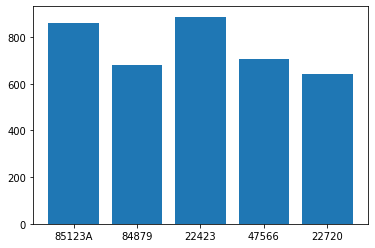

In [24]:
#Item best sold for each user
print(df['CustomerID'].isnull().values.any())
prods = df.ProdID.unique()
d = {i: 0 for i in prods} #prodotti venduti maggiormente
for customer in df.CustomerID.unique():
        result = df[df["CustomerID"] == customer]
        result = result.groupby("ProdID").sum()
        if(len(result)!=0):
                for i in range(len(result)):
                        d[result.iloc[i].name]+=1
                #print("CustomerID ", customer, " : ", result.iloc[0].name)
        else: print("NO ACQUISTI CustomerID ", customer)

#prodotti più selezionati dai  clienti
x = 5
d = {key: value for key, value in d.items() if value in sorted(set(d.values()), reverse=True)[:x]}
print(d)
exit
keys = d.keys()
values = d.values()
plt.bar(keys, values, align='center')

        

In [2]:
#prodotti più acquistati.
df.groupby("ProdID")["Qta"].sum()

ProdID
10002           1022
10080            461
10120            193
10123C             5
10123G           -38
                ... 
gift_0001_20      13
gift_0001_30      34
gift_0001_40       3
gift_0001_50       2
m                  1
Name: Qta, Length: 3953, dtype: int64